In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

In [169]:
df = pd.read_csv('/content/Indian_railway1.csv')

df = df.dropna(how="any")

df.head()

,Train No,Train Name,SEQ,Station Code,Station Name,Arrival time,Departure Time,Distance,Source Station,Source Station Name,Destination Station,Destination Station Name
0,107,SWV-MAO-VLNK,1,SWV,SAWANTWADI R,00:00:00,10:25:00,0,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
1,107,SWV-MAO-VLNK,2,THVM,THIVIM,11:06:00,11:08:00,32,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
2,107,SWV-MAO-VLNK,3,KRMI,KARMALI,11:28:00,11:30:00,49,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
3,107,SWV-MAO-VLNK,4,MAO,MADGOAN JN.,12:10:00,00:00:00,78,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
4,108,VLNK-MAO-SWV,1,MAO,MADGOAN JN.,00:00:00,20:30:00,0,MAO,MADGOAN JN.,SWV,SAWANTWADI ROAD


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186114 entries, 0 to 186123
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Train No                  186114 non-null  object
 1   Train Name                186114 non-null  object
 2   SEQ                       186114 non-null  object
 3   Station Code              186114 non-null  object
 4   Station Name              186114 non-null  object
 5   Arrival time              186114 non-null  object
 6   Departure Time            186114 non-null  object
 7   Distance                  186114 non-null  object
 8   Source Station            186114 non-null  object
 9   Source Station Name       186114 non-null  object
 10  Destination Station       186114 non-null  object
 11  Destination Station Name  186114 non-null  object
dtypes: object(12)
memory usage: 18.5+ MB


In [171]:
df.tail()

,Train No,Train Name,SEQ,Station Code,Station Name,Arrival time,Departure Time,Distance,Source Station,Source Station Name,Destination Station,Destination Station Name
186119,99908,EMU,8,AKRD,AKURDI,23:30:00,23:31:00,19,PUNE,PUNE JN.,TGN,TALEGAON
186120,99908,EMU,9,DEHR,DEHU ROAD,23:35:00,23:36:00,24,PUNE,PUNE JN.,TGN,TALEGAON
186121,99908,EMU,10,BGWI,BEGDAEWAI,23:39:00,23:40:00,28,PUNE,PUNE JN.,TGN,TALEGAON
186122,99908,EMU,11,GRWD,GHORAWADI,23:41:00,23:42:00,31,PUNE,PUNE JN.,TGN,TALEGAON
186123,99908,EMU,12,TGN,TALEGAON,23:50:00,00:00:00,34,PUNE,PUNE JN.,TGN,TALEGAON


In [172]:
df.shape

(186114, 12)

In [173]:
df.isnull().mean()*100

Train No                    0.0
Train Name                  0.0
SEQ                         0.0
Station Code                0.0
Station Name                0.0
Arrival time                0.0
Departure Time              0.0
Distance                    0.0
Source Station              0.0
Source Station Name         0.0
Destination Station         0.0
Destination Station Name    0.0
dtype: float64

In [174]:
#Total distance covered by each train


station_code = df['Station Code']

#Filtering the DataFrame based on the condition
filtered_df = df[df['Destination Station'] == station_code]

#Getting the relevant columns
relevant_columns = ['Train Name', 'Train No','Distance', 'Source Station Name', 'Destination Station Name']
result = filtered_df[relevant_columns]

print("Train Details:")
print(result)

Train Details:
          Train Name Train No Distance Source Station Name  \
3       SWV-MAO-VLNK      107       78     SAWANTWADI ROAD   
7       VLNK-MAO-SWV      108       83         MADGOAN JN.   
29      MAO-KOP SPEC      128      978         MADGOAN JN.   
30      PALACE ON WH      290        0   DELHI-SAFDAR JANG   
43      PALACE ON WH      290     2694   DELHI-SAFDAR JANG   
...              ...      ...      ...                 ...   
186076  PUNE-TGN EMU    99904       34            PUNE JN.   
186087           EMU    99905       31            TALEGAON   
186099           EMU    99906       34            PUNE JN.   
186111           EMU    99907       34            TALEGAON   
186123           EMU    99908       34            PUNE JN.   

                  Destination Station Name  
3                              MADGOAN JN.  
7                          SAWANTWADI ROAD  
29      CHHATRAPATI SHAHU MAHARAJ TERMINUS  
30                       DELHI-SAFDAR JANG  
43             

In [175]:
#Details of trains that arrive at stations between 12 AM and 6 AM


filtered_df = df[(df['Arrival time'] > '00:00:00') & (df['Arrival time'] <= '06:00:00')]

#Getting the relevant columns
relevant_columns = ['Train Name', 'Train No', 'Station Name', 'Arrival time']
result = filtered_df[relevant_columns]

print("Train Details:")
print(result)

Train Details:
          Train Name Train No  Station Name Arrival time
18      MAO-KOP SPEC      128   SANGMESHWAR     00:34:00
19      MAO-KOP SPEC      128       CHIPLUN     01:10:00
20      MAO-KOP SPEC      128          KHED     01:52:00
21      MAO-KOP SPEC      128       MANGAON     04:00:00
22      MAO-KOP SPEC      128          ROHA     04:55:00
...              ...      ...           ...          ...
186036  TGN-PUNE EMU    99901     KASARWADI     00:32:00
186037  TGN-PUNE EMU    99901        DAPODI     00:36:00
186038  TGN-PUNE EMU    99901        KHADKI     00:40:00
186039  TGN-PUNE EMU    99901  SHIVAJINAGAR     00:45:00
186040  TGN-PUNE EMU    99901      PUNE JN.     01:15:00

[26958 rows x 4 columns]


The above data tells us which trains are more prone to accidents since most of the catastrophe occurs between 12 AM and 6 AM when visibility is poor and when some drivers drink and drive.

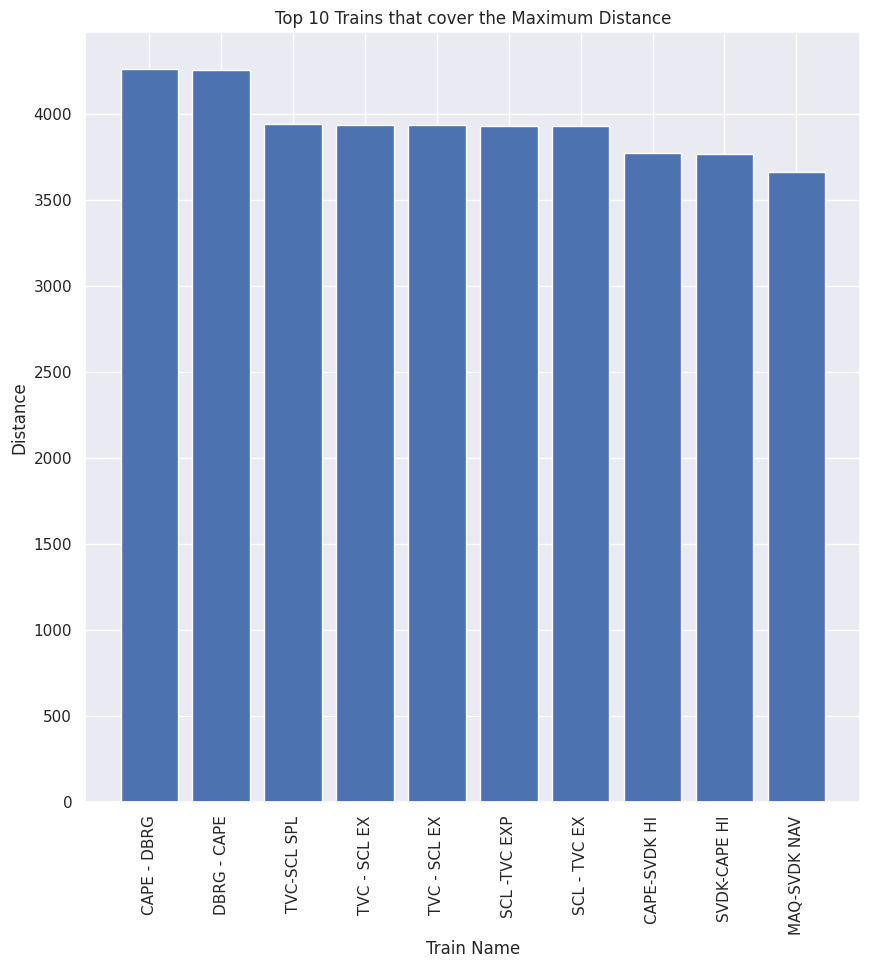

In [177]:
#Top 10 trains that cover the maximum distance


filtered_df = df[df['Station Code'] == df['Destination Station']]

df['Distance'] = df['Distance'].fillna(0)

df['Distance'] = df['Distance'].astype(int)

#Sorting the filtered DataFrame by distance in descending order
sorted_df = filtered_df.sort_values(by='Distance', ascending=False)

top_10_distances = sorted_df['Distance'].head(10)

#Creating a bar plot for the top 10 trains that cover the maximum distance
plt.bar(range(len(top_10_distances)), top_10_distances)
plt.xlabel('Train Name')
plt.ylabel('Distance')
plt.title('Top 10 Trains that cover the Maximum Distance')
plt.xticks(range(len(top_10_distances)), sorted_df['Train Name'].head(10), rotation='vertical')
plt.show()

In [178]:
#All source and destination stations


source_stations = df['Source Station Name'].unique()
destination_stations = df['Destination Station Name'].unique()

#Combining source and destination station names and removing duplicates
all_stations = list(set().union(source_stations, destination_stations))
all_stations = sorted(all_stations)

#Printing all unique station names
print("Unique Station Names:")
for station in all_stations:
    print(station)

Unique Station Names:
ABHANPUR JN.
ABOHAR
ABU ROAD
ACHHNERA JN.
ADILABAD
ADRA
ADRAJ MOTI
AGARTALA
AGRA  FORT
AGRA CANTT
AHMEDABAD
AHMEDABAD JN.
AIT JN
AJMER JN.
AJNI
AKOLA JN.
ALIGARH JN.
ALIPUR DUAR JN.
ALLAHABAD CITY
ALLAHABAD JN.
ALLEPPEY
ALWAR JN.
AMB  ANDAURA
AMBALA CANTT JN
AMBERNATH
AMBIKAPUR
AMBLIYASAN JN.
AMLA JN.
AMRAVATI
AMRITSAR JN.
AMTA
ANAND JN.
ANAND VIHAR TERMINAL
ANDAL JN.
ANDHERI
ANGUL
ANKLESHWAR JN.
ANUPGARH
ANUPPUR JN.
ARA
ARAKKONAM JN
ARAMBAG
ARSIKERE JN.
ASANGAON
ASANSOL MAIN
ATARI JN
AUNRIHAR JN.
AURANGABAD
AVADI
AYODHYA
AZAMGARH
AZIMGANJ JN.
BADAMPAHAR
BADARPUR JN.
BADLAPUR
BADNERA JN.
BADSHAHNAGAR
BAGALKOT
BAGAVATHIPURAM
BAGNAN
BAHRAICH
BAIDYANATHDHAM
BAIJNATH PAPROLA
BAIYYAPPANAHALLI
BAKHTIYARPUR JN.
BALAMAU JN.
BALANGIR
BALASORE
BALGONA
BALHARSHAH
BALICHAK
BALLABGARH
BALLIA
BALLY
BALLYGUNGE JN.
BALRAMPUR,
BALURGHAT
BAMANHAT
BANASWADI
BANDA JN
BANDEL JN.
BANDIKUI JN.
BANDRA TERMINUS
BANGALORE CANTT.
BANGAON JN.
BANGARPET JN.
BANGRIPOSI
BANIHAL
BANKA
BANKURA
BA

All source and destination stations have huge locomotive workshops established around them to modify, clean and repair trains in case of any damage after their long jouney.

In [179]:
#Total number of source and destination stations

count = len(all_stations)
print(count)

932


In [180]:
#Unique train numbers


unique_train_numbers = df['Train No'].unique()

count = len(unique_train_numbers)
print(count)

11114


The above data gives us a count of all the trains that run in Indian Railways.

    Source Station Source Station Name  Train No
225           CSTM          CST-MUMBAI       461
762           SDAH             SEALDAH       372
576            MSB       CHENNAI BEACH       339
382            HWH          HOWRAH JN.       338
498            KYN           KALYAN JN       285
859            TNA               THANE       186
674           PNVL              PANVEL       141
835            TBM            TAMBARAM       140
560           MMCC         MOOR MARKET       135
900           VLCY          VELACHEERY       115


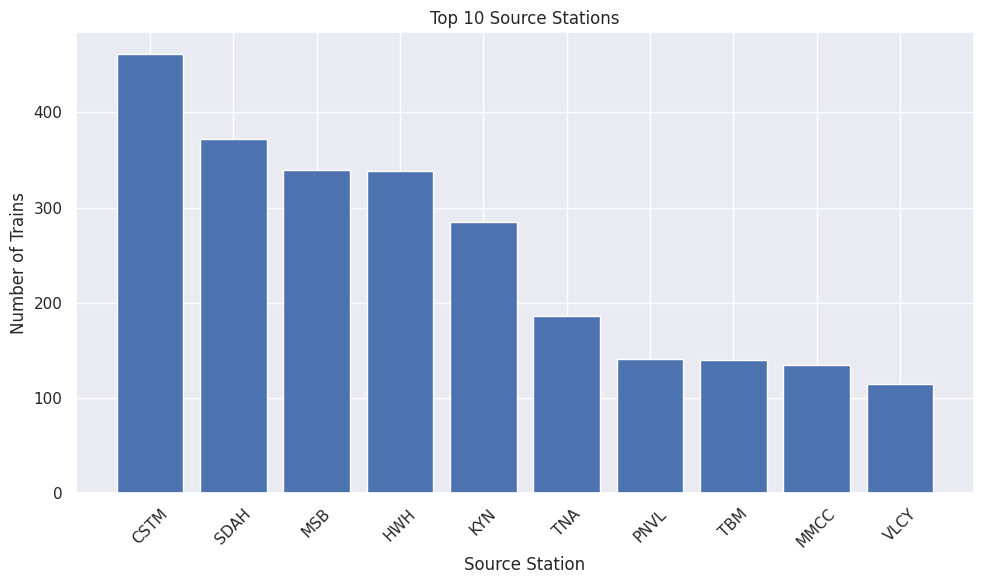

In [181]:
#Top 10 Source Stations


trains_per_station = df.groupby(['Source Station', 'Source Station Name'])['Train No'].nunique().reset_index()

#Sorting the stations based on the count of unique train numbers in descending order
sorted_stations = trains_per_station.sort_values('Train No', ascending=False).head(10)
print(sorted_stations)

#Creating a bar plot for the top 10 source stations
plt.figure(figsize=(10, 6))
plt.bar(sorted_stations['Source Station'], sorted_stations['Train No'])
plt.xlabel('Source Station')
plt.ylabel('Number of Trains')
plt.title('Top 10 Source Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The above data gives us our top 10 source stations from where maximum number of trains start.

    Destination Station Destination Station Name  Train No
225                CSTM               CST-MUMBAI       460
766                SDAH                  SEALDAH       373
577                 MSB            CHENNAI BEACH       342
383                 HWH               HOWRAH JN.       337
499                 KYN                KALYAN JN       284
862                 TNA                    THANE       194
678                PNVL                   PANVEL       144
839                 TBM                 TAMBARAM       140
561                MMCC              MOOR MARKET       132
902                VLCY               VELACHEERY       118


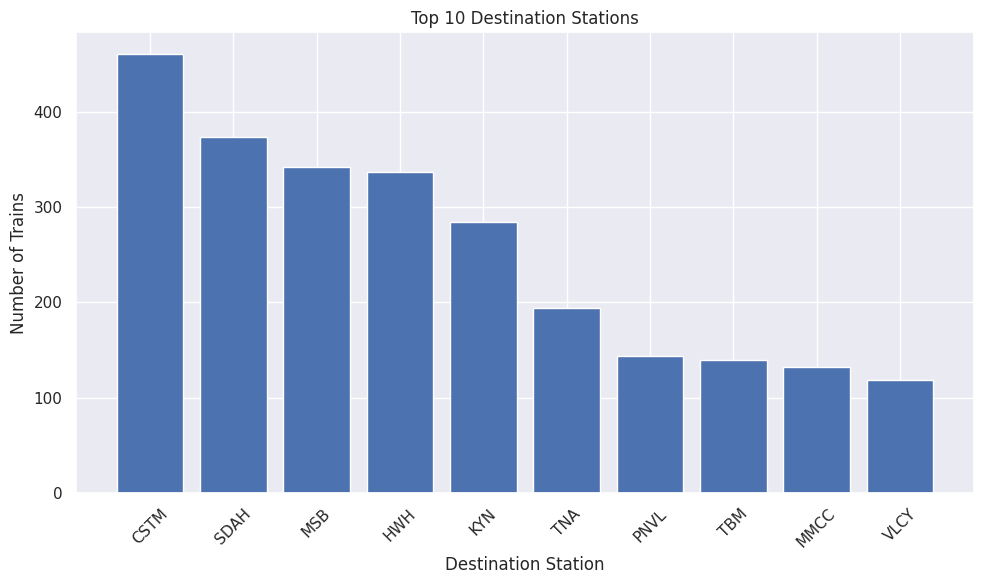

In [182]:
#Top 10 Destination Stations


trains_per_station = df.groupby(['Destination Station', 'Destination Station Name'])['Train No'].nunique().reset_index()

#Sorting the stations based on the count of unique train numbers in descending order
sorted_stations = trains_per_station.sort_values('Train No', ascending=False).head(10)
print(sorted_stations)

#Creating a bar plot for the top 10 source stations
plt.figure(figsize=(10, 6))
plt.bar(sorted_stations['Destination Station'], sorted_stations['Train No'])
plt.xlabel('Destination Station')
plt.ylabel('Number of Trains')
plt.title('Top 10 Destination Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The above data gives us our top 10 destination stations where maximum number of trains come to a halt.

In [183]:
#Total number of stations where trains stop mid-journey

source_station_names = df['Source Station Name'].unique()
destination_station_names = df['Destination Station Name'].unique()

# Getting the unique station names that are neither source nor destination stations
unique_station_names = df[~df['Station Name'].isin(source_station_names) & ~df['Station Name'].isin(destination_station_names)]['Station Name'].unique()

count = len(unique_station_names)
print(count)

7375


The above data gives us a count of stations where trains stop for a very short peroid of time while on their way to their destination.

Top 10 stations where trains stop mid-journey:
CHENNAI BEAC: 738 trains
VIJAYWADA JN: 416 trains
BIDHANNAGAR: 404 trains
MUMBAI (MATU: 393 trains
MULUND: 393 trains
MUMBAI (BYCU: 392 trains
KANPUR CENTR: 382 trains
BHANDUP: 373 trains
VIKHROLI: 370 trains
NAHUR: 355 trains


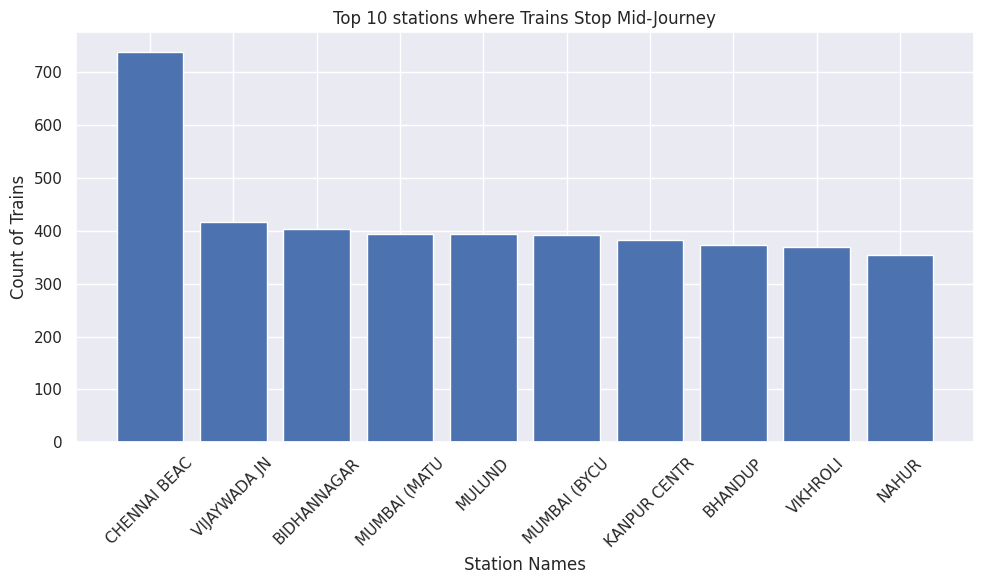

In [184]:
#Top 10 stations where trains stop mid-journey journey


source_station_names = df['Source Station Name'].unique()
destination_station_names = df['Destination Station Name'].unique()

#Getting the unique station names that are neither source nor destination stations
unique_station_names = df[~df['Station Name'].isin(source_station_names) & ~df['Station Name'].isin(destination_station_names)]

#Counting the unique train numbers for each station
station_train_counts = unique_station_names.groupby('Station Name')['Train No'].nunique().sort_values(ascending=False).head(10)

#Printing the top 10 station names along with the count of unique train numbers
print("Top 10 stations where trains stop mid-journey:")
for station_name, count in station_train_counts.items():
    print(f"{station_name}: {count} trains")

#Plotting the top 10 stations
plt.figure(figsize=(10, 6))
plt.bar(station_train_counts.index, station_train_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Station Names')
plt.ylabel('Count of Trains')
plt.title('Top 10 stations where Trains Stop Mid-Journey')
plt.tight_layout()
plt.show()

The above data gives us our top 10 stations where maximum number of trains stop while on their way to their destination.

These stations have small 'sheds' built around them to repair or clean trains whenever necessary mid-journey.

These stations have great potential for the establishment of huge locomotive workshops around them, however fewer population and poor connectivity are a few hurdles in the process.